# Calculating the radio loudness parameters for the sources in our catalog and finding out the total number of radio loud galaxies. The radio loud galaxies are separately stored in another file.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


rogue = pd.read_csv("rogue_all.csv")
rogue = rogue.set_index("No.")

rmag = rogue['rmag'].tolist()
n = len(rogue)


b = 1.2e-10

def flux(m):
    
    ff0 = 2*b*np.sinh(-((m*np.log(10))/2.5) - np.log(b))
    return(ff0)

S_o = []

for i in range(n):
    a = 3631*flux(rmag[i])*1000 #mJy
    S_o.append(a)

#print(S_o)

rogue['OpticalFLux'] = S_o




S_r = rogue['CoreFlux'].tolist()


#__________________________________________________________________________________________________________



#Finding the corrected ratio between radio and optical

z = rogue['z'].tolist()


alpha_r = -0.3
alpha_o = -1.0


def logf(S,alpha,z):
    
    logf1 = np.log10(S) - (1 + alpha)*np.log10(1+z)
    return(logf1)

logfr = []
logfo = []

for j in range(n):
    
    logfr.append(logf(S_r[j], alpha_r, z[j]))
    
    logfo.append(logf(S_o[j], alpha_o, z[j]))


logR = []
R = []

for k in range(n):

    logR.append(logfr[k] - logfo[k])
    R.append(10**(logfr[k] - logfo[k]))
    
    
rogue['Log(R)'] = logR
rogue['Ratio'] = R



RadioLoud = rogue[rogue.Ratio > 10]



print("\nFull catalog:")
display(rogue)

print("\nRadio Loud Galaxies:")
display(RadioLoud)


rogue.to_csv("rogue_mod.csv")
RadioLoud.to_csv("radio_loud2.csv")


#__________________________________________________________________________________________________________



Full catalog:


,Plate,MJD,Fiber,RAdeg,DEdeg,z,RAh,RAm,RAs,DE-,...,El_CE_6584,exp_AB_r,O3O2p_dr,O32_dr,O3N2_dr,log_LHaObsExp_dr_POP5,Separation,OpticalFLux,Log(R),Ratio
No.,,,,,,,,,,,,,,,,,,,,,
1,266,51630,25,146.956070,-0.342297,0.134663,9,47,49.453,0,...,0.483,0.9863,-0.4594,-0.4594,-0.5424,0.38210,0.108536,0.349966,2.418435,262.080869
2,266,51630,42,146.565613,-1.084756,0.097580,9,46,15.738,-1,...,0.608,0.3685,-0.2667,-0.2667,-0.1172,1.26800,0.165184,0.501217,0.385612,2.430033
3,266,51630,77,146.809128,0.026360,0.126075,9,47,14.183,0,...,0.682,0.8918,-999.0000,-999.0000,-999.0000,-0.05652,0.175774,0.794376,0.503209,3.185734
4,266,51630,90,146.143570,-0.741639,0.203829,9,44,34.458,0,...,0.593,0.5875,-999.0000,-999.0000,-999.0000,-0.91500,0.177193,0.831814,0.433512,2.713386
5,266,51630,100,146.007797,-0.642273,0.005024,9,44,1.896,0,...,0.158,0.6661,-999.0000,-999.0000,2.2180,3.76300,0.097833,1.247459,0.016394,1.038469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32612,2974,54592,485,260.424042,31.356297,0.224093,17,21,41.766,31,...,0.386,0.7415,-999.0000,-999.0000,-999.0000,-0.01372,0.129680,0.483088,0.956935,9.055961
32613,2974,54592,538,260.535004,31.292458,0.222390,17,22,8.441,31,...,0.466,0.8056,-999.0000,-999.0000,-999.0000,-999.00000,0.150057,0.322126,0.651036,4.477502
32614,2974,54592,589,260.613281,32.132572,0.223310,17,22,27.073,32,...,0.511,0.8295,-999.0000,-999.0000,-999.0000,-0.76240,0.112769,2.128268,0.142177,1.387322



Radio Loud Galaxies:


,Plate,MJD,Fiber,RAdeg,DEdeg,z,RAh,RAm,RAs,DE-,...,El_CE_6584,exp_AB_r,O3O2p_dr,O32_dr,O3N2_dr,log_LHaObsExp_dr_POP5,Separation,OpticalFLux,Log(R),Ratio
No.,,,,,,,,,,,,,,,,,,,,,
1,266,51630,25,146.956070,-0.342297,0.134663,9,47,49.453,0,...,0.483,0.9863,-0.4594,-0.4594,-0.54240,0.3821,0.108536,0.349966,2.418435,262.080869
9,266,51630,255,145.526230,-0.747411,0.218403,9,42,6.297,0,...,0.398,0.8812,-999.0000,-999.0000,-999.00000,-999.0000,0.115040,0.267932,1.065804,11.636015
11,266,51630,543,146.806839,0.665554,0.020080,9,47,13.587,0,...,1.583,0.7808,-0.7146,-0.7146,-0.68080,1.3830,0.217106,0.496622,1.414870,25.993800
13,266,51630,572,146.781509,0.737954,0.261903,9,47,7.515,0,...,0.429,0.7146,-999.0000,-999.0000,-999.00000,-999.0000,0.168653,0.416894,1.280996,19.098341
14,266,51630,613,147.080475,0.788018,0.211183,9,48,19.281,0,...,0.489,0.5933,-1.0320,-1.0320,0.34590,1.6380,0.110920,0.440581,1.192043,15.561211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32597,2974,54592,50,261.073303,30.775995,0.355509,17,24,17.601,30,...,0.286,0.8310,-999.0000,-999.0000,-999.00000,-999.0000,0.017341,0.197708,1.497431,31.436234
32601,2974,54592,101,260.986786,29.900150,0.189715,17,23,56.851,29,...,0.415,0.8761,-0.3996,-0.3996,0.04755,0.3998,0.184842,0.340428,1.189681,15.476807
32610,2974,54592,404,259.716797,31.737898,0.189106,17,18,52.045,31,...,0.190,0.7695,-999.0000,-999.0000,-999.00000,0.9286,0.011200,0.356472,1.024730,10.585944


# Plotting the histogram for the logarithmic radio loudness paramenter for the entire catalog of data and showing the distinction between radio loud and radio quiet galaxies using the radio loudness parameter limit

# $\log(R)>1$ means radio loud and $\log(R)<1$ means radio quiet.


Histogram:


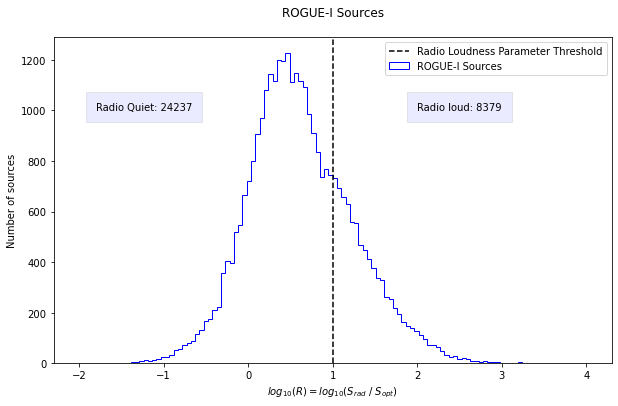

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

rogue = pd.read_csv("rogue_mod.csv")
rogue = rogue.set_index("No.")

logR = rogue["Log(R)"].tolist()


#_____________________________________________________________________________________________________________

n_rl = len(RadioLoud)
n_rq = len(rogue) - n_rl

print("\nHistogram:")

plt.figure(figsize=(10,6))

plt.hist(logR,bins = 'auto', color='blue', histtype = 'step', linewidth=1, range = (-2,4), label='ROGUE-I Sources')
plt.axvline(x=1, color = 'k', linestyle = 'dashed', label='Radio Loudness Parameter Threshold')
plt.legend()

plt.text(-1.8, 1000, r'Radio Quiet: ' + str(n_rq), bbox={'facecolor': 'blue', 'alpha': 0.08, 'pad': 10})
plt.text(2, 1000, r'Radio loud: ' + str(n_rl), bbox={'facecolor': 'blue', 'alpha': 0.08, 'pad': 10})

plt.xlabel('$log_{10}{(R)} = log_{10}{(S_{rad}}$ / $S_{opt}$)')
plt.ylabel('Number of sources')
plt.title('ROGUE-I Sources\n')
plt.show()




Finding total number of radio loud and radio quiet galaxies for different morphologies:

Number of Radio Loud Compact galaxies:  373
Number of Radio Loud Elongated galaxies:  6299
Number of Radio Loud FR-I galaxies:  267
Number of Radio Loud FR-II galaxies:  267
Number of Radio Loud hybrid galaxies:  126
Number of Radio Loud Z shaped galaxies:  16
Number of Radio Loud X shaped galaxies:  8
Number of Radio Loud Double-Double galaxies:  5
Number of Radio Loud Wide-angle tailed galaxies:  193
Number of Radio Loud Narrow-angle tailed galaxies:  87
Number of Radio Loud Head-Tail galaxies:  17

Plot:


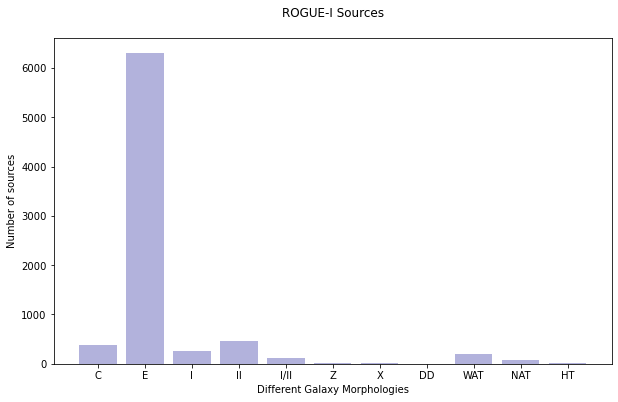

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#For each morphology:

print("\nFinding total number of radio loud and radio quiet galaxies for different morphologies:\n")



#Compact

compact_RL = RadioLoud[(RadioLoud.Finalclass == "C" )| (RadioLoud.Finalclass == "pC" )]
n_c_rl = len(compact_RL)
print("Number of Radio Loud Compact galaxies: ", n_c_rl)

compact_RL.to_csv("compact_RL.csv")



#Elongated

elongated_RL = RadioLoud[(RadioLoud.Finalclass == "E") | (RadioLoud.Finalclass == "pE" )]
n_e_rl = len(elongated_RL)
print("Number of Radio Loud Elongated galaxies: ", n_e_rl)
elongated_RL.to_csv("elongated_RL.csv")



#FR1

FR1_RL = RadioLoud[(RadioLoud.Finalclass == "I") | (RadioLoud.Finalclass == "pI" )]
n_fr1_rl = len(FR1_RL)
print("Number of Radio Loud FR-I galaxies: ", n_fr1_rl)
FR1_RL.to_csv("FR1_RL.csv")



#FR2

FR2_RL = RadioLoud[(RadioLoud.Finalclass == "II") | (RadioLoud.Finalclass == "pII" )]
n_fr2_rl = len(FR2_RL)
print("Number of Radio Loud FR-II galaxies: ", n_fr1_rl)
FR2_RL.to_csv("FR2_RL.csv")



#Hybrid

hyb_RL = RadioLoud[(RadioLoud.Finalclass == "I,II") | (RadioLoud.Finalclass == "pI,II" )]
n_hyb_rl = len(hyb_RL)
print("Number of Radio Loud hybrid galaxies: ", n_hyb_rl)
hyb_RL.to_csv("hyb_RL.csv")



#Z

Z_RL = RadioLoud[((RadioLoud.Finalclass == "Z") | (RadioLoud.Finalclass == "pZ" ))]
n_z_rl = len(Z_RL)
print("Number of Radio Loud Z shaped galaxies: ", n_z_rl)
Z_RL.to_csv("Z_RL.csv")



#X

X_RL = RadioLoud[(RadioLoud.Finalclass == "X") | (RadioLoud.Finalclass == "pX" )]
n_x_rl = len(X_RL)
print("Number of Radio Loud X shaped galaxies: ", n_x_rl)
X_RL.to_csv("X_RL.csv")



#Double Double

DD_RL = RadioLoud[(RadioLoud.Finalclass == "DD") | (RadioLoud.Finalclass == "pDD" )]
n_dd_rl = len(DD_RL)
print("Number of Radio Loud Double-Double galaxies: ", n_dd_rl)
DD_RL.to_csv("DD_RL.csv")



#WAT

WAT_RL = RadioLoud[(RadioLoud.Finalclass == "WAT") | (RadioLoud.Finalclass == "pWAT" )]
n_wat_rl = len(WAT_RL)
print("Number of Radio Loud Wide-angle tailed galaxies: ", n_wat_rl)
WAT_RL.to_csv("WAT_RL.csv")



#NAT

NAT_RL = RadioLoud[(RadioLoud.Finalclass == "NAT") | (RadioLoud.Finalclass == "pNAT" )]
n_nat_rl = len(NAT_RL)
print("Number of Radio Loud Narrow-angle tailed galaxies: ", n_nat_rl)
NAT_RL.to_csv("NAT_RL.csv")



#HT

HT_RL = RadioLoud[(RadioLoud.Finalclass == "HT") | (RadioLoud.Finalclass == "pHT" )]
n_ht_rl = len(HT_RL)
print("Number of Radio Loud Head-Tail galaxies: ", n_ht_rl)
HT_RL.to_csv("HT_RL.csv")
#Bar plot


dict = {
    
    'C' : n_c_rl,
    'E' : n_e_rl,
    'I' : n_fr1_rl,
    'II' : n_fr2_rl,
    'I/II' : n_hyb_rl,
    'Z' : n_z_rl,
    'X' : n_x_rl,
    'DD' : n_dd_rl,
    'WAT' : n_wat_rl,
    'NAT' : n_nat_rl,
    'HT' : n_ht_rl,

}

print("\nPlot:")
plt.figure(figsize=(10,6))
plt.bar(list(dict.keys()), dict.values(), color='darkblue', alpha = 0.3)
plt.xlabel('Different Galaxy Morphologies')
plt.ylabel('Number of sources')
plt.title('ROGUE-I Sources\n')
plt.show()

# Plotting the histogram for different morphologies, and showing the distinction between radio loud and radio quiet galaxies using the radio loudness parameter limit.

# $\log(R)>1$ means radio loud and $\log(R)<1$ means radio quiet.

Total number of Compact galaxies:  4785
Total number of Elongated galaxies:  24452

Histogram:


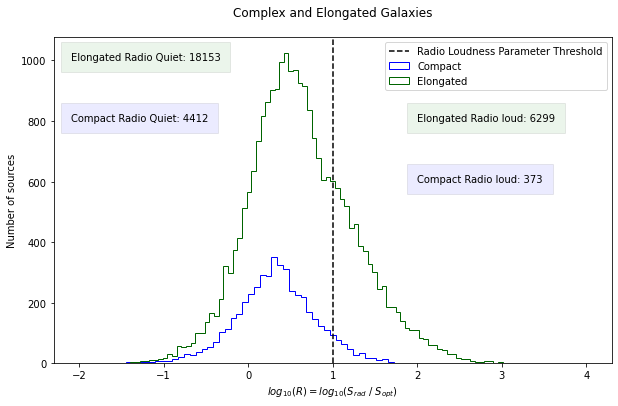



Number of FR-I galaxies:  416
Number of FR-II galaxies:  871

Histogram:


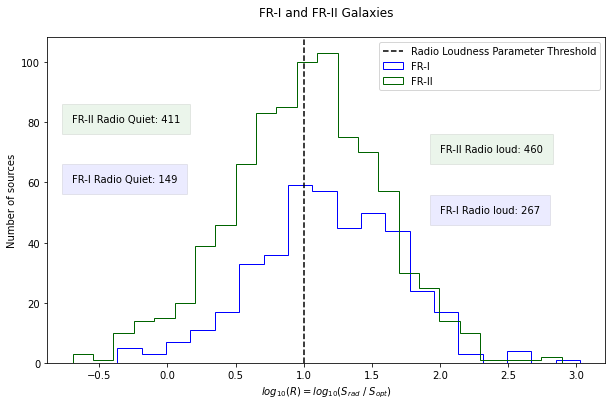



Number of hybrid galaxies:  216

Histogram:


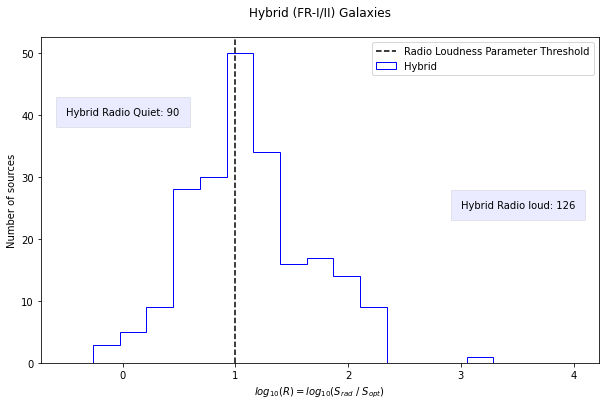



Number of Z shaped galaxies:  25

Histogram:


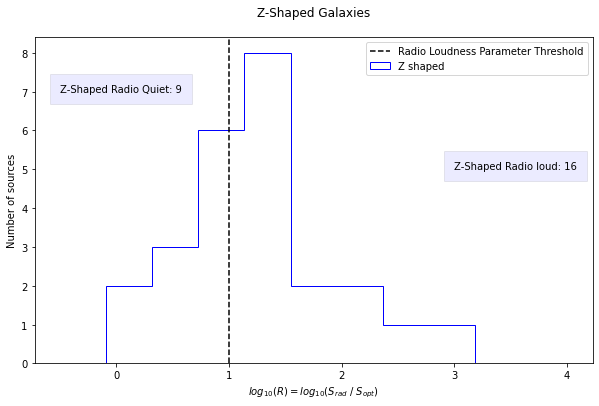



Number of X shaped galaxies:  14

Histogram:


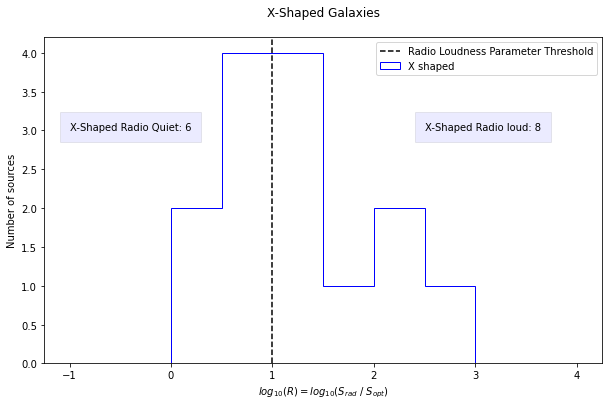



Number of Double-Double galaxies:  20

Histogram:


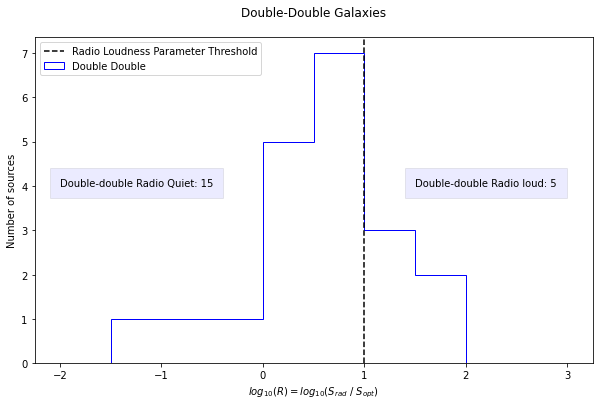



Number of Wide-angle tailed galaxies:  309

Histogram:


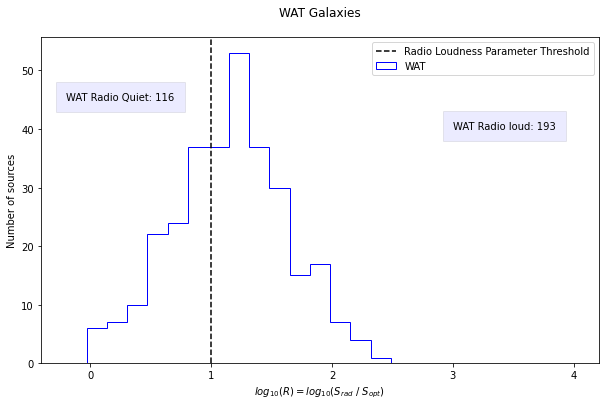



Number of Narrow-angle tailed galaxies:  126

Histogram:


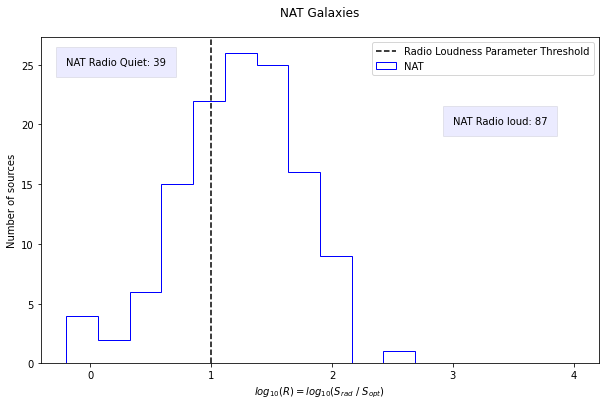



Number of Head-Tail galaxies:  28

Histogram:


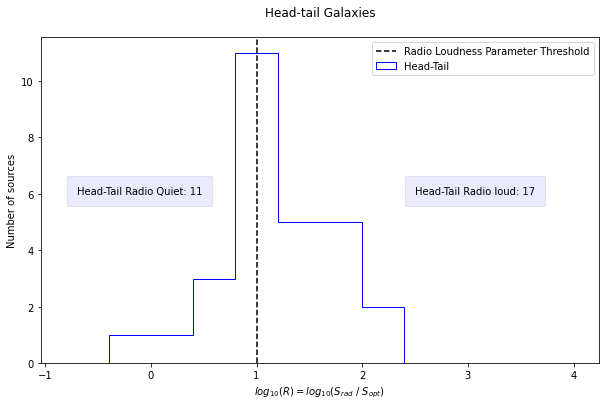

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

rogue = pd.read_csv("rogue_mod.csv")
rogue = rogue.set_index("No.")



#for different morphologies


#____________________________________________________________________________________________________________



#Compact and Elongated

compact = rogue[(rogue.Finalclass == "C" )| (rogue.Finalclass == "pC" )]
elongated = rogue[(rogue.Finalclass == "E" )| (rogue.Finalclass == "pE" )]

n_c = len(compact)
n_e = len(elongated)

n_c_rq = n_c - n_c_rl
n_e_rq = n_e - n_e_rl

compact.to_csv("compact.csv")
elongated.to_csv("elongated.csv")

c = compact['Log(R)'].tolist()
e = elongated['Log(R)'].tolist()

print("Total number of Compact galaxies: ", n_c)
print("Total number of Elongated galaxies: ", n_e)


print("\nHistogram:")

plt.figure(figsize=(10,6))

plt.hist(c,bins = 'auto', color='blue', histtype = 'step', linewidth = 1, label='Compact', range = (-2,4))
plt.hist(e,bins = 'auto', color='darkgreen', histtype = 'step', linewidth = 1, label='Elongated', range = (-2,4))

plt.axvline(x=1, color = 'k', linestyle = 'dashed', label = 'Radio Loudness Parameter Threshold')

plt.legend()

plt.text(-2.1, 800, r'Compact Radio Quiet: ' + str(n_c_rq), bbox={'facecolor': 'blue', 'alpha': 0.08, 'pad': 10})
plt.text(2, 600, r'Compact Radio loud: ' + str(n_c_rl), bbox={'facecolor': 'blue', 'alpha': 0.08, 'pad': 10})

plt.text(-2.1, 1000, r'Elongated Radio Quiet: ' + str(n_e_rq), bbox={'facecolor': 'green', 'alpha': 0.08, 'pad': 10})
plt.text(2, 800, r'Elongated Radio loud: ' + str(n_e_rl), bbox={'facecolor': 'green', 'alpha': 0.08, 'pad': 10})
plt.xlabel('$log_{10}{(R)} = log_{10}{(S_{rad}}$ / $S_{opt}$)')
plt.ylabel('Number of sources')
plt.title('Complex and Elongated Galaxies\n')
plt.show()


#____________________________________________________________________________________________________________



#FR1 and FR2

FR1 = rogue[(rogue.Finalclass == "I") | (rogue.Finalclass == "pI" )]
FR2 = rogue[(rogue.Finalclass == "II") | (rogue.Finalclass == "pII" )]

n_fr1 = len(FR1)
n_fr2 = len(FR2)

n_fr1_rq = n_fr1 - n_fr1_rl
n_fr2_rq = n_fr2 - n_fr2_rl

FR1.to_csv("FR1.csv")
FR2.to_csv("FR2.csv")

fr1 = FR1['Log(R)'].tolist()
fr2 = FR2['Log(R)'].tolist()

print("\n\nNumber of FR-I galaxies: ", n_fr1)
print("Number of FR-II galaxies: ", n_fr2)

print("\nHistogram:")

plt.figure(figsize=(10,6))

plt.hist(fr1,bins = 'auto', color='blue', histtype = 'step', linewidth = 1, label='FR-I')
plt.hist(fr2,bins = 'auto', color='darkgreen', histtype = 'step', linewidth = 1, label='FR-II')

plt.axvline(x=1, color = 'k', linestyle = 'dashed', label = 'Radio Loudness Parameter Threshold')

plt.legend()

plt.text(-0.7, 60, r'FR-I Radio Quiet: ' + str(n_fr1_rq), bbox={'facecolor': 'blue', 'alpha': 0.08, 'pad': 10})
plt.text(2, 50, r'FR-I Radio loud: ' + str(n_fr1_rl), bbox={'facecolor': 'blue', 'alpha': 0.08, 'pad': 10})

plt.text(-0.7, 80, r'FR-II Radio Quiet: ' + str(n_fr2_rq), bbox={'facecolor': 'green', 'alpha': 0.08, 'pad': 10})
plt.text(2, 70, r'FR-II Radio loud: ' + str(n_fr2_rl), bbox={'facecolor': 'green', 'alpha': 0.08, 'pad': 10})


plt.xlabel('$log_{10}{(R)} = log_{10}{(S_{rad}}$ / $S_{opt}$)')
plt.ylabel('Number of sources')
plt.title('FR-I and FR-II Galaxies\n')

plt.show()



#_____________________________________________________________________________________________________________



#Hybrid

hyb = rogue[(rogue.Finalclass == "I,II") | (rogue.Finalclass == "pI,II" )]
n_hyb = len(hyb)
print("\n\nNumber of hybrid galaxies: ", n_hyb)
hyb.to_csv("hyb.csv")
hyb1 = hyb['Log(R)'].tolist()


print("\nHistogram:")

plt.figure(figsize=(10,6))

plt.hist(hyb1,bins = 'auto', color='blue', histtype = 'step', linewidth = 1, label='Hybrid', range = (-0.5,4))

plt.axvline(x=1, color = 'k', linestyle = 'dashed', label = 'Radio Loudness Parameter Threshold')

plt.legend()

n_hyb = len(hyb)
n_hyb_rq = n_hyb - n_hyb_rl

plt.text(-0.5, 40, r'Hybrid Radio Quiet: ' + str(n_hyb_rq), bbox={'facecolor': 'blue', 'alpha': 0.08, 'pad': 10})
plt.text(3, 25, r'Hybrid Radio loud: ' + str(n_hyb_rl), bbox={'facecolor': 'blue', 'alpha': 0.08, 'pad': 10})

plt.xlabel('$log_{10}{(R)} = log_{10}{(S_{rad}}$ / $S_{opt}$)')
plt.ylabel('Number of sources')
plt.title('Hybrid (FR-I/II) Galaxies\n')
plt.show()


#____________________________________________________________________________________________________________



#Z

Z = rogue[((rogue.Finalclass == "Z") | (rogue.Finalclass == "pZ" ))]
n_z = len(Z)
print("\n\nNumber of Z shaped galaxies: ", n_z)
Z.to_csv("Z.csv")
z = Z['Log(R)'].tolist()


print("\nHistogram:")

plt.figure(figsize=(10,6))

plt.hist(z,bins = 'auto', color='blue', histtype = 'step', linewidth = 1, label='Z shaped', range = (-0.5,4))

plt.axvline(x=1, color = 'k', linestyle = 'dashed', label = 'Radio Loudness Parameter Threshold')

plt.legend()

n_z = len(z)
n_z_rq = n_z - n_z_rl

plt.text(-0.5, 7, r'Z-Shaped Radio Quiet: ' + str(n_z_rq), bbox={'facecolor': 'blue', 'alpha': 0.08, 'pad': 10})
plt.text(3, 5, r'Z-Shaped Radio loud: ' + str(n_z_rl), bbox={'facecolor': 'blue', 'alpha': 0.08, 'pad': 10})
plt.xlabel('$log_{10}{(R)} = log_{10}{(S_{rad}}$ / $S_{opt}$)')
plt.ylabel('Number of sources')
plt.title('Z-Shaped Galaxies\n')
plt.show()



#____________________________________________________________________________________________________________



#X

X = rogue[(rogue.Finalclass == "X") | (rogue.Finalclass == "pX" )]
n_x = len(X)
print("\n\nNumber of X shaped galaxies: ", n_x)
X.to_csv("X.csv")
x = X['Log(R)'].tolist()


print("\nHistogram:")

plt.figure(figsize=(10,6))

plt.hist(x,bins = 'auto', color='blue', histtype = 'step', linewidth = 1, label='X shaped', range = (-1,4))

plt.axvline(x=1, color = 'k', linestyle = 'dashed', label = 'Radio Loudness Parameter Threshold')

plt.legend(loc = 'upper right')

n_x = len(x)
n_x_rq = n_x - n_x_rl

plt.text(-1, 3, r'X-Shaped Radio Quiet: ' + str(n_x_rq), bbox={'facecolor': 'blue', 'alpha': 0.08, 'pad': 10})
plt.text(2.5, 3, r'X-Shaped Radio loud: ' + str(n_x_rl), bbox={'facecolor': 'blue', 'alpha': 0.08, 'pad': 10})
plt.xlabel('$log_{10}{(R)} = log_{10}{(S_{rad}}$ / $S_{opt}$)')
plt.ylabel('Number of sources')
plt.title('X-Shaped Galaxies\n')
plt.show()


#____________________________________________________________________________________________________________



#Double Double

DD = rogue[(rogue.Finalclass == "DD") | (rogue.Finalclass == "pDD" )]
n_dd = len(DD)
print("\n\nNumber of Double-Double galaxies: ", n_dd)
DD.to_csv("DD.csv")
dd = DD['Log(R)'].tolist()

print("\nHistogram:")

plt.figure(figsize=(10,6))

plt.hist(dd,bins = 'auto', color='blue', histtype = 'step', linewidth = 1, label='Double Double', range = (-2,3))

plt.axvline(x=1, color = 'k', linestyle = 'dashed', label = 'Radio Loudness Parameter Threshold')

plt.legend(loc = 'upper left')

n_dd = len(dd)
n_dd_rq = n_dd - n_dd_rl

plt.text(-2, 4, r'Double-double Radio Quiet: ' + str(n_dd_rq), bbox={'facecolor': 'blue', 'alpha': 0.08, 'pad': 10})
plt.text(1.5, 4, r'Double-double Radio loud: ' + str(n_dd_rl), bbox={'facecolor': 'blue', 'alpha': 0.08, 'pad': 10})
plt.xlabel('$log_{10}{(R)} = log_{10}{(S_{rad}}$ / $S_{opt}$)')
plt.ylabel('Number of sources')
plt.title('Double-Double Galaxies\n')
plt.show()


#____________________________________________________________________________________________________________



#WAT

WAT = rogue[(rogue.Finalclass == "WAT") | (rogue.Finalclass == "pWAT" )]
n_wat = len(WAT)
print("\n\nNumber of Wide-angle tailed galaxies: ", n_wat)
WAT.to_csv("WAT.csv")
wat = WAT['Log(R)'].tolist()

print("\nHistogram:")

plt.figure(figsize=(10,6))

plt.hist(wat,bins = 'auto', color='blue', histtype = 'step', linewidth = 1, label='WAT', range = (-0.2,4))

plt.axvline(x=1, color = 'k', linestyle = 'dashed', label = 'Radio Loudness Parameter Threshold')

plt.legend()

n_wat = len(wat)
n_wat_rq = n_wat - n_wat_rl

plt.text(-0.2, 45, r'WAT Radio Quiet: ' + str(n_wat_rq), bbox={'facecolor': 'blue', 'alpha': 0.08, 'pad': 10})
plt.text(3, 40, r'WAT Radio loud: ' + str(n_wat_rl), bbox={'facecolor': 'blue', 'alpha': 0.08, 'pad': 10})
plt.xlabel('$log_{10}{(R)} = log_{10}{(S_{rad}}$ / $S_{opt}$)')
plt.ylabel('Number of sources')
plt.title('WAT Galaxies\n')
plt.show()


#____________________________________________________________________________________________________________



#NAT

NAT = rogue[(rogue.Finalclass == "NAT") | (rogue.Finalclass == "pNAT" )]
n_nat = len(NAT)
print("\n\nNumber of Narrow-angle tailed galaxies: ", n_nat)
NAT.to_csv("NAT.csv")
nat = NAT['Log(R)'].tolist()

print("\nHistogram:")

plt.figure(figsize=(10,6))

plt.hist(nat,bins = 'auto', color='blue', histtype = 'step', linewidth = 1, label='NAT', range = (-0.2,4))


plt.axvline(x=1, color = 'k', linestyle = 'dashed', label = 'Radio Loudness Parameter Threshold')

plt.legend()

n_nat = len(nat)
n_nat_rq = n_nat - n_nat_rl

plt.text(-0.2, 25, r'NAT Radio Quiet: ' + str(n_nat_rq), bbox={'facecolor': 'blue', 'alpha': 0.08, 'pad': 10})
plt.text(3, 20, r'NAT Radio loud: ' + str(n_nat_rl), bbox={'facecolor': 'blue', 'alpha': 0.08, 'pad': 10})
plt.xlabel('$log_{10}{(R)} = log_{10}{(S_{rad}}$ / $S_{opt}$)')
plt.ylabel('Number of sources')
plt.title('NAT Galaxies\n')
plt.show()


#____________________________________________________________________________________________________________


#HT

HT = rogue[(rogue.Finalclass == "HT") | (rogue.Finalclass == "pHT" )]
n_ht = len(HT)
print("\n\nNumber of Head-Tail galaxies: ", n_ht)
HT.to_csv("HT.csv")
ht = HT['Log(R)'].tolist()

print("\nHistogram:")

plt.figure(figsize=(10,6))

plt.hist(ht,bins = 'auto', color='blue', histtype = 'step', linewidth = 1, label='Head-Tail', range = (-0.8,4))


plt.axvline(x=1, color = 'k', linestyle = 'dashed', label = 'Radio Loudness Parameter Threshold')

plt.legend()

n_ht = len(ht)
n_ht_rq = n_ht - n_ht_rl

plt.text(-0.7, 6, r'Head-Tail Radio Quiet: ' + str(n_ht_rq), bbox={'facecolor': 'blue', 'alpha': 0.08, 'pad': 10})
plt.text(2.5, 6, r'Head-Tail Radio loud: ' + str(n_ht_rl), bbox={'facecolor': 'blue', 'alpha': 0.08, 'pad': 10})
plt.xlabel('$log_{10}{(R)} = log_{10}{(S_{rad}}$ / $S_{opt}$)')
plt.ylabel('Number of sources')
plt.title('Head-tail Galaxies\n')
plt.show()


